## Keltner Channel

Keltner Channel은 Chester W. Keltner가 1960년대에 개발한 기술적 분석 도구로, 주식이나 다른 금융 자산의 변동성을 측정하고, 추세와 가능한 반전 신호를 식별하는 데 사용된다. 이 지표는 세 개의 밴드로 구성된다

1. 중앙선 (Middle Line): 일반적으로 20일 이동 평균선이 사용된다. 이는 자산의 평균 가격을 나타낸다.
2. 상단 밴드 (Upper Band): 중앙선에서 이동 평균선 주위의 평균 가격 범위(ATR, Average True Range)의 특정 배수(보통 2배)만큼 떨어진 곳에 위치한다.
3. 하단 밴드 (Lower Band): 중앙선에서 ATR의 특정 배수만큼 아래에 위치한다

Keltner Channel은 중앙선을 기준으로 주가의 평균적인 변동 폭을 나타내는 밴드를 사용해, 주가의 이상적인 상단 및 하단 범위를 보여준다. 주가가 상단 밴드를 넘어서면 과매수 상태로 간주되고, 하단 밴드를 넘어서면 과매도 상태로 간주된다. 또한, 주가가 채널의 상단이나 하단을 지속적으로 타격하거나 넘어서는 것은 추세의 강력한 신호로 해석될 수 있다.

Keltner Channel은 시장의 변동성 변화에 따라 밴드의 폭이 자동으로 조정되므로, 시장 조건의 변화에 따른 추세와 반전 신호를 식별하는 데 유용하게 사용된다. 이러한 밴드는 또한 거래 범위와 추세의 시작 또는 종료 시점을 파악하는 데 도움을 줄 수 있다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.volatility import keltner_channel_hband, keltner_channel_lband, keltner_channel_mband, keltner_channel_pband, keltner_channel_wband, keltner_channel_hband_indicator, keltner_channel_lband_indicator
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [21]:
hband = keltner_channel_hband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

lband = keltner_channel_lband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

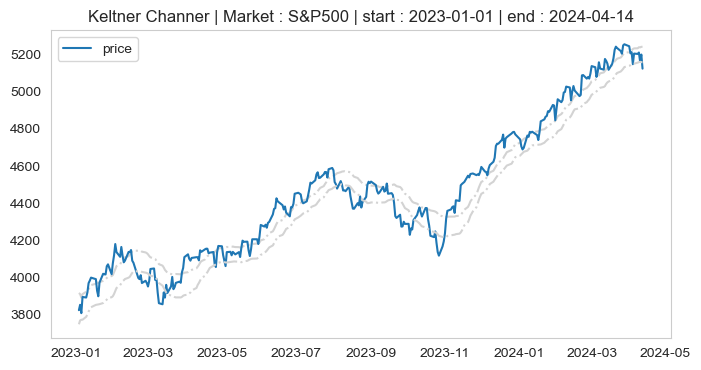

In [20]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'], label = 'price')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)
plt.title(f'Keltner Channer | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

In [5]:
hband_indicator = keltner_channel_hband_indicator(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

lband_indicator = keltner_channel_lband_indicator(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

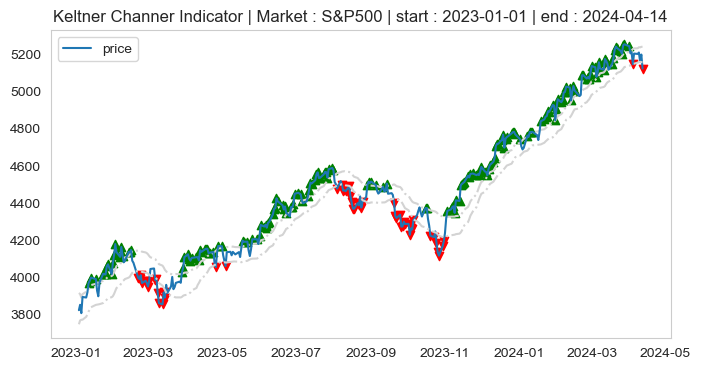

In [8]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.plot(data['Close'], label = 'price')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)
plt.title(f'Keltner Channer Indicator | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

In [9]:
mband = keltner_channel_mband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

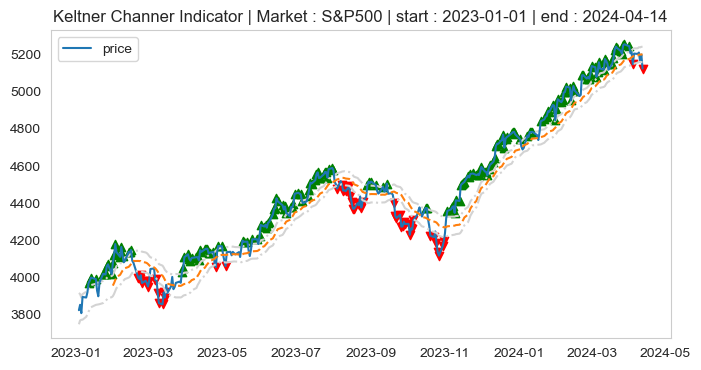

In [10]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.plot(data['Close'], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)
plt.title(f'Keltner Channer Indicator | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

In [22]:
pband = keltner_channel_pband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

wband = keltner_channel_wband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    window_atr = 10,
    fillna = False,
    original_version = True
)

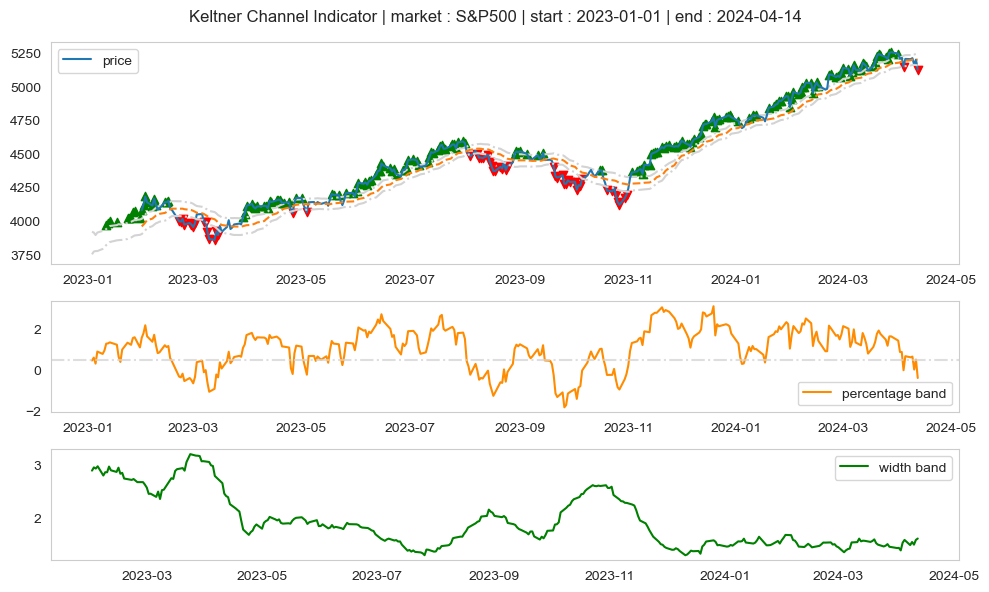

In [24]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.plot(data['Close'][19:], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(pband, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 0.5, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['percentage band'])

plt.subplot(gs[2])
plt.plot(wband, color = 'green')
plt.grid(False)
plt.legend(['width band'])

plt.suptitle(f'Keltner Channel Indicator | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()